## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/04_genus_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,...,Intrasporangium,sp10518,sp44151,Limnobacter,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.092816,0.001058,0.042075,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,65,0,0,NaN,NaN
1,P2,1,0.698862,0.001191,0.004366,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,67,0,0,31.25,17.0
2,P3,1,0.034017,0.259365,0.003640,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0,1,33,0,0,33.30,16.0
3,P4,1,0.029042,0.177362,0.015877,0.0,0.0,0.127216,0.0,0.000000,...,0.0,0.0,0.0,0,1,66,0,0,93.75,21.0
4,P5,1,0.307662,0.164086,0.050351,0.0,0.0,0.000331,0.0,0.000463,...,0.0,0.0,0.0,0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:600]

,Corynebacterium,Staphylococcus,Propionibacterium,sp50014,Moraxella,Blautia,sp50017,sp5276,Finegoldia,Acinetobacter,...,Dyella,Actinopolymorpha,Trichococcus,melongena,Methylophilus,Murdochiella,Intrasporangium,sp10518,sp44151,Limnobacter
0,0.092816,0.001058,0.042075,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.698862,0.001191,0.004366,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.034017,0.259365,0.003640,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.029042,0.177362,0.015877,0.000000,0.000000,0.127216,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.307662,0.164086,0.050351,0.000000,0.000000,0.000331,0.000000,0.000463,0.0,0.002183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.015879,0.130277,0.522496,0.000000,0.001456,0.000000,0.000595,0.042676,0.0,0.055313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
87,0.456597,0.420537,0.009461,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.004830,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
88,0.158295,0.048375,0.097082,0.631328,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
89,0.565824,0.358825,0.053255,0.000000,0.000000,0.000000,0.000000,0.002117,0.0,0.001522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:600]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [8]:
clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y, cv=looxgb, scoring='accuracy', return_estimator=True)


In [9]:
xgb_scores

{'fit_time': array([0.28645802, 0.26620626, 0.27356768, 0.27688956, 0.27053809,
        0.27947545, 0.26576805, 0.28167129, 0.28030348, 0.28094673,
        0.27943277, 0.27182388, 0.28343296, 0.27254343, 0.26806045,
        0.2653656 , 0.28211999, 0.28010607, 0.28167582, 0.28295445,
        0.27419567, 0.27879715, 0.2980485 , 0.27878714, 0.28079224,
        0.28347683, 0.2799356 , 0.27906513, 0.28149223, 0.27578926,
        0.28145385, 0.27566385, 0.28251553, 0.27760148, 0.27616429,
        0.28092575, 0.28044581, 0.27368426, 0.27756429, 0.27771831,
        0.27653742, 0.27822447, 0.27104783, 0.26756048, 0.26471996,
        0.26393151, 0.26474023, 0.26453352, 0.27070975, 0.27241564,
        0.27441549, 0.28027463, 0.27385831, 0.27649999, 0.27611065,
        0.27606988, 0.27592325, 0.2775507 , 0.27445817, 0.27555394,
        0.27722621, 0.27574325, 0.27751207, 0.27708793, 0.26701379,
        0.27808094, 0.28049064, 0.27935171, 0.2765708 , 0.27777219,
        0.27577662, 0.27867675, 0.27

In [10]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

The most important features for estimator 0:
                               Importance
Faecalibacterium                 0.095165
Brevundimonas                    0.091421
Finegoldia                       0.078552
Anaerococcus                     0.077121
ParacocccusParacoccus            0.070080
...                                   ...
Planococcus                      0.000000
Haemophilus                      0.000000
EscherichiaShigellaSalmonella    0.000000
Modestobacter                    0.000000
Limnobacter                      0.000000

[598 rows x 1 columns]
The most important features for estimator 1:
                               Importance
Flavobacterium                   0.099794
Brachybacterium                  0.097117
sp14135                          0.076261
Faecalibacterium                 0.071319
ParacocccusParacoccus            0.064653
...                                   ...
Planococcus                      0.000000
Haemophilus                      0.000000
Prev

In [11]:
feature_importances_complete

,Importance
Faecalibacterium,0.095165
Brevundimonas,0.091421
Finegoldia,0.078552
Anaerococcus,0.077121
ParacocccusParacoccus,0.070080
...,...
Quadrisphaera,0.000000
sp31072,0.000000
sp35056,0.000000
Planococcus,0.000000


In [12]:
feature_importances_complete.shape

(54418, 1)

In [13]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [14]:
fic[:15]

,Importance
sp14135,0.088205
Faecalibacterium,0.081735
Flavobacterium,0.070466
ParacocccusParacoccus,0.069814
Brachybacterium,0.064641
Anaerococcus,0.058550
Stenotrophomonas,0.046379
Actinomyces,0.038256
Brevundimonas,0.037714
Acinetobacter,0.035465


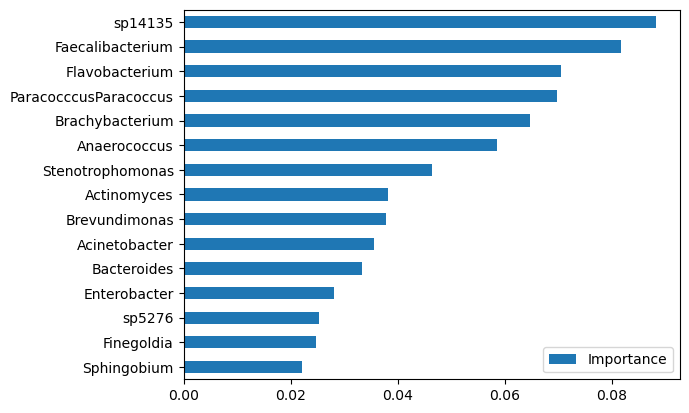

In [15]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [16]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

[21:00:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:00:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:00:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[21:00:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

In [17]:
np.shape(shap_valuesxgb)

(91, 598)

In [18]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [19]:
np.shape(shap_valuesxgb_mean)

(1, 598)

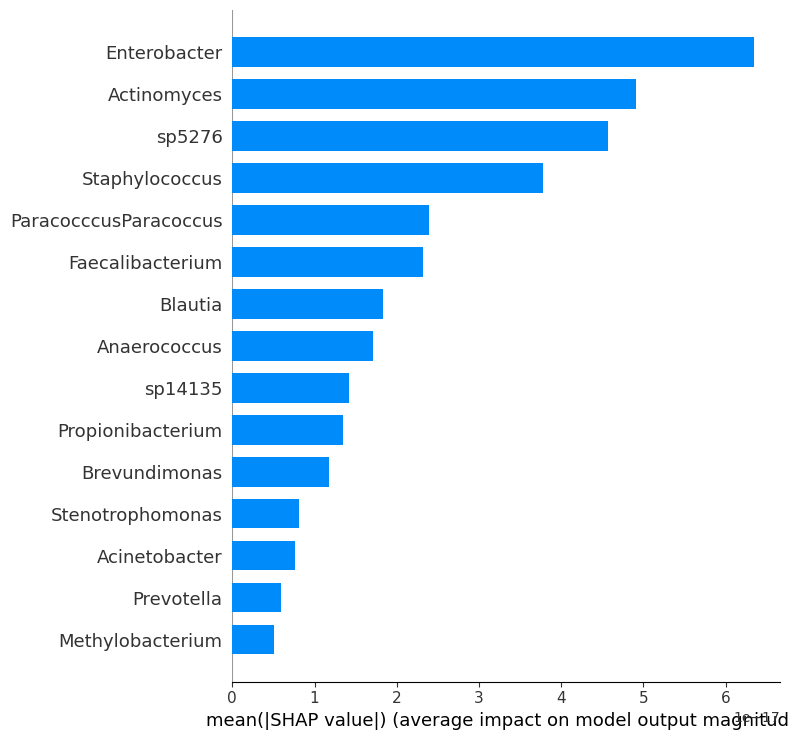

In [20]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15)

### LightGBM

In [21]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', return_estimator=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 60, number of negative: 30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [22]:
lgbm_scores

{'fit_time': array([0.09134793, 0.02425146, 0.01658916, 0.01500201, 0.01413512,
        0.01303244, 0.01846528, 0.01400137, 0.01404214, 0.01891971,
        0.01706338, 0.01278448, 0.02082467, 0.01745725, 0.01976943,
        0.01598501, 0.01299906, 0.02100348, 0.01221704, 0.02045298,
        0.01928353, 0.01996875, 0.01599216, 0.02158618, 0.01408958,
        0.02189875, 0.01400542, 0.07891488, 0.02024317, 0.02161551,
        0.01508331, 0.0191071 , 0.01629543, 0.01916599, 0.02227473,
        0.02254057, 0.02122378, 0.02193666, 0.01655555, 0.01929545,
        0.02169681, 0.02206659, 0.01690865, 0.01713634, 0.01542783,
        0.01999927, 0.02081227, 0.0163281 , 0.01918817, 0.01729751,
        0.01907253, 0.02002382, 0.02296972, 0.02043033, 0.02260351,
        0.01480627, 0.01392031, 0.01768994, 0.01804161, 0.02312326,
        0.02077293, 0.01763725, 0.02196193, 0.01300073, 0.0142777 ,
        0.0130384 , 0.02176476, 0.0220542 , 0.01719069, 0.01454616,
        0.01866984, 0.01676488, 0.01

In [23]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

The most important features for estimator 0:
                   Importance
Propionibacterium          32
Staphylococcus             29
Anaerococcus               21
Blautia                    21
Corynebacterium            19
...                       ...
sp31072                     0
Quadrisphaera               0
sp23073                     0
Mitsuaria                   0
Limnobacter                 0

[598 rows x 1 columns]
The most important features for estimator 1:
                   Importance
Propionibacterium          29
Staphylococcus             28
Anaerococcus               26
Blautia                    23
Enterobacter               19
...                       ...
sp31072                     0
Quadrisphaera               0
sp23073                     0
Mitsuaria                   0
Limnobacter                 0

[598 rows x 1 columns]
The most important features for estimator 2:
                   Importance
Propionibacterium          33
Staphylococcus             25
Anaeroc

In [24]:
feature_importances_complete_lgb

,Importance
Propionibacterium,32
Staphylococcus,29
Anaerococcus,21
Blautia,21
Corynebacterium,19
...,...
sp31072,0
Quadrisphaera,0
sp23073,0
Mitsuaria,0


In [25]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [26]:
fic_lgb[:15]

,Importance
Propionibacterium,29.109890
Staphylococcus,28.285714
Anaerococcus,23.263736
Blautia,21.131868
Enterobacter,19.417582
Sphingobacterium,18.703297
Acinetobacter,18.087912
Corynebacterium,17.923077
Sphingobium,13.186813
Bacteroides,11.384615


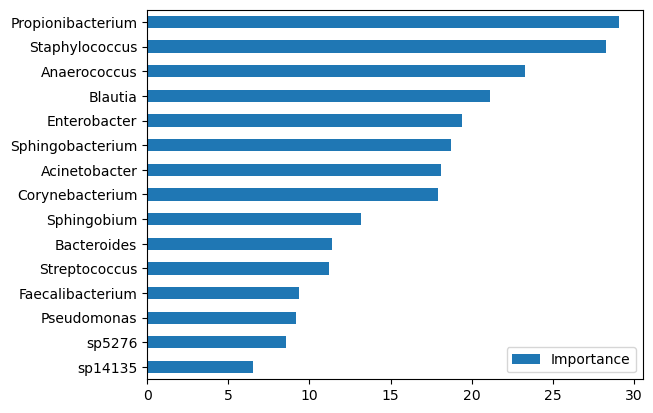

In [27]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [28]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [29]:
np.shape(shap_valueslgb)

(91, 598)

In [30]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [31]:
np.shape(shap_valueslgb_mean)

(1, 598)

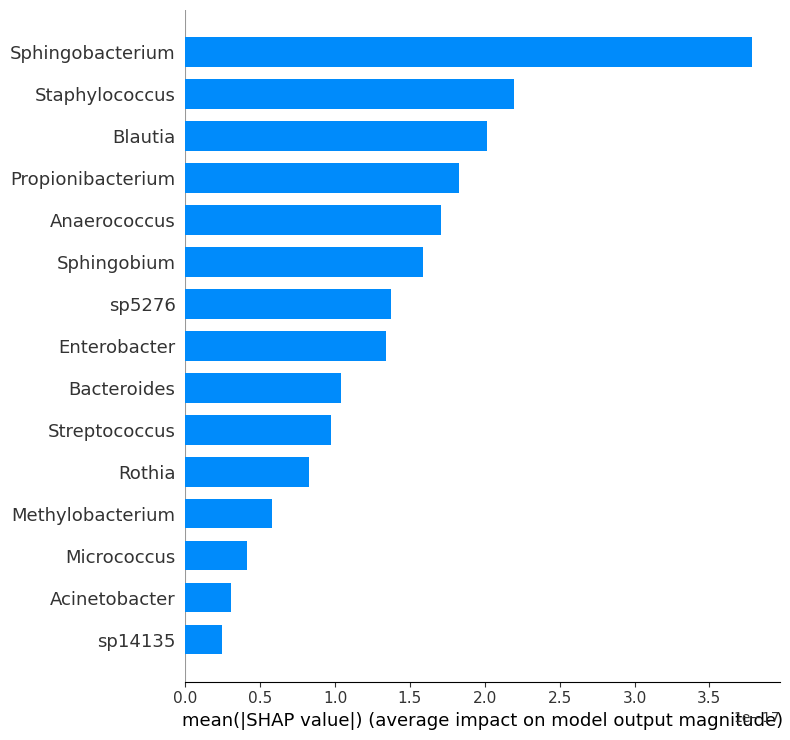

In [32]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15)

### Multilayer perceptron 

In [33]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [34]:
mlp_scores

{'fit_time': array([0.89791012, 0.85073376, 1.03245974, 0.97887874, 0.82552338,
        0.87254691, 0.94331098, 0.84743094, 0.84666824, 0.9596591 ,
        0.88695669, 0.80447316, 0.82520723, 0.82212234, 0.7855866 ,
        1.05991364, 0.98879957, 0.81839108, 0.82778215, 0.88831234,
        0.78369164, 0.80108809, 0.81018496, 0.82552385, 0.76952219,
        0.80019069, 0.80496192, 0.79282093, 0.81262136, 0.78998423,
        0.81822038, 0.79963374, 0.76955462, 0.80999875, 0.85185266,
        0.82952094, 0.77415466, 0.80047894, 0.79177976, 0.80881   ,
        0.81066155, 0.78962302, 0.7943399 , 0.77960753, 0.79333568,
        0.78807187, 0.80198812, 0.77737522, 0.76364684, 0.79712915,
        0.82088375, 0.80657172, 0.80891132, 0.81346011, 0.86283755,
        0.86060786, 0.7903955 , 0.80469227, 0.7852695 , 0.81201243,
        0.7988255 , 0.78899598, 0.79378605, 0.80893636, 0.80063176,
        0.79614592, 0.7919755 , 0.79904652, 0.78523374, 0.7911799 ,
        0.81712127, 0.82775855, 0.80

In [35]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    print(f'The most important features for estimator {idx}:')
    print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

The most important features for estimator 0:
              Features  Importance
2    Propionibacterium    0.088462
0      Corynebacterium    0.064835
1       Staphylococcus    0.063736
8           Finegoldia    0.025824
3              sp50014    0.023077
..                 ...         ...
128    Novosphingobium   -0.000549
327        Nakamurella   -0.000549
110         Tyzzerella   -0.000549
161             Vibrio   -0.001099
127            sp12595   -0.001099

[598 rows x 2 columns]
The most important features for estimator 1:
              Features  Importance
2    Propionibacterium    0.088462
0      Corynebacterium    0.064835
1       Staphylococcus    0.063736
8           Finegoldia    0.025824
3              sp50014    0.023077
..                 ...         ...
128    Novosphingobium   -0.000549
327        Nakamurella   -0.000549
110         Tyzzerella   -0.000549
161             Vibrio   -0.001099
127            sp12595   -0.001099

[598 rows x 2 columns]
The most important fea

In [36]:
MLPfeatures.shape

(598, 2)

In [37]:
MLP_feature_importances_complete.shape

(54418, 2)

In [38]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [39]:
fic_mlp.shape

(598, 1)

In [40]:
fic_mlp[:15]

,Importance
Features,
Propionibacterium,0.088462
Corynebacterium,0.064835
Staphylococcus,0.063736
Finegoldia,0.025824
sp50014,0.023077
sp50017,0.015934
Pinus,0.013736
Eremococcus,0.011538
sp23735sp23751,0.010989


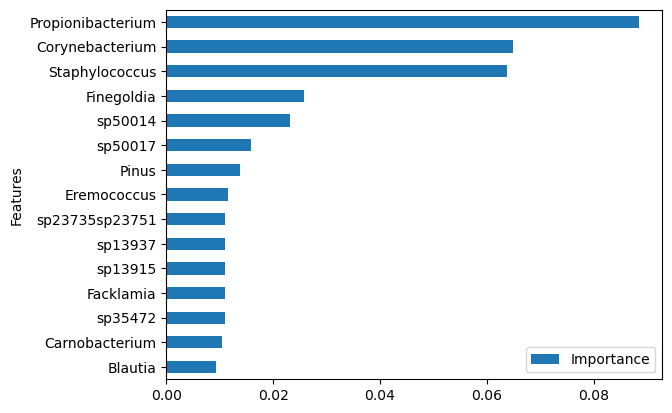

In [41]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [42]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

Permutation explainer: 92it [01:15,  1.09it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:17,  1.01it/s]                        
Permutation explainer: 92it [01:14,  1.06it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:14,  1.06it/s]                        
Permutation explainer: 92it [01:14,  1.07it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:14,  1.06it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permutation explainer: 92it [01:13,  1.07it/s]                        
Permut

In [43]:
np.shape(shap_valuesmlp)

(91, 598)

In [44]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [45]:
np.shape(shap_valuesmlp_mean)

(1, 598)

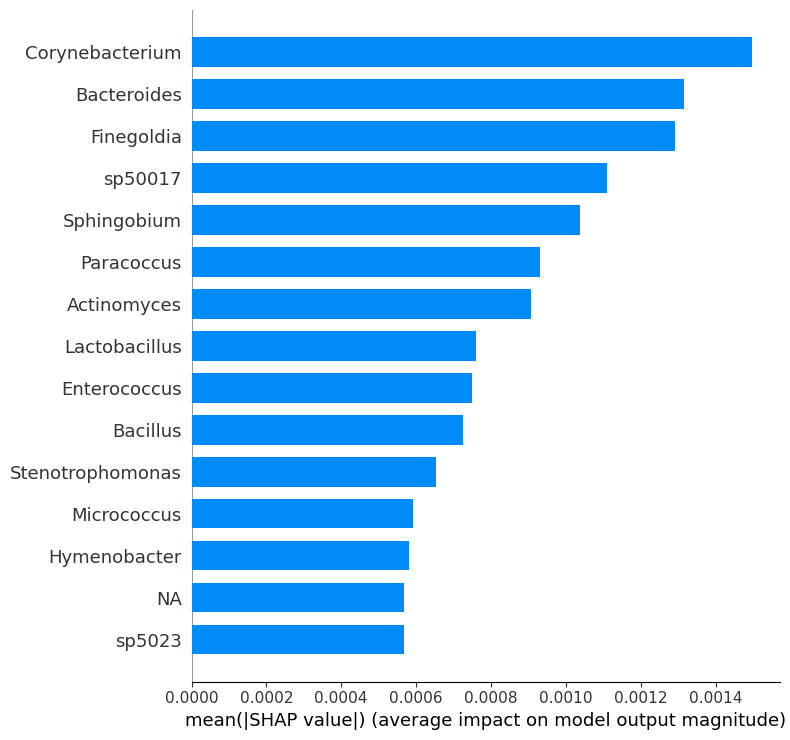

In [46]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15)